In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

## Lexical features

## Syntactic features

## Cpp keywords

- **module**: cpp_keywords.py
- **input**: filenames (numpy array)
- **output**: keywords frequencies (numpy array)

### Ключевые слова языка C/C++

Могут быть найдены по ссылке в [официальной документации](http://ru.cppreference.com/w/cpp/keyword "cppreference.com")

Частоты ключевых слов языка C/C++:

| float | class | while | namespace | .. |
-----| --- | -------| --- | --- | --- |
file_1| 0.353 | 0.000 | 0.000 | 0.707 | ... |
file_2| 0.401 | 0.213 | 0.000 | 0.708 | ... |
... | ... | ... | ... | ... | ... |
file_n | 0.303 | 0.000 | 0.678 | 0.807 | ... |


### widgets

In [57]:
from ipywidgets import interact

def f(x):
    return x

interact(f, x=10);

interact(f, x=True);


@interact(x=True, y=1.0)
def g(x, y):
    return (x, y)

### main functions

In [ ]:
# username = Text()
# password = Text()
#     Box([Label(value='Username:'), username], layout=form_item_layout),
#     Box([Label(value='Password:'), password], layout=form_item_layout),
# Text(value='Username')
# from ipywidgets import Text, IntSlider, Box, Layout, Label, Dropdown, Textarea, Button

In [82]:
# %load_ext autoreload
%reload_ext autoreload
%autoreload

from ipywidgets import IntSlider, Box, Layout, Label, Dropdown, Button
from IPython.display import display, HTML, clear_output
from core.whose_cpp_code import classify_authors
from numpy import mean, std
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")


def make_pie(sizes, text, colors, labels):

    col = [[i/255. for i in c] for c in colors]

    fig, ax = plt.subplots()
    ax.axis('equal')
    width = 0.35
    kwargs = dict(colors=col, startangle=180)
    outside, _ = ax.pie(sizes, radius=1, pctdistance=1-width/2,labels=labels,**kwargs)
    plt.setp( outside, width=width, edgecolor='white')

    kwargs = dict(size=20, fontweight='bold', va='center')
    ax.text(0, 0, text, ha='center', **kwargs)
    plt.show()
    

def get_confidence(array):
    alpha = 0.95
    m = mean(array)  # general average
    sigma = std(array)  # standard deviation 

    # confidence interval
    print('mean accuracy: ', m)
    print('standart deviation: ', sigma)
    print('confidence interval: (', m - alpha * sigma, ';', m + alpha * sigma, ')')


form_layout = Layout(
    display='flex',
    flex_flow='column',
    align_items='stretch',
    width='50%'
)

form_item_layout = Layout(
    display='flex',
    flex_flow='row',
    justify_content='space-between'
)


# loops = IntSlider(min=1, max=10)
data = Dropdown(options={'students' : '/media/marina/hdd/diploma/data/c++/data/', 
                           'GoogleCodeJam' : '/media/marina/hdd/diploma/data/c++/data3/', 
                           'GitHub' : '/media/marina/hdd/diploma/data/c++/github_data/'})
classifier =  Dropdown(options={'RandomForest' : 'RandomForestClassifier', 
                                'GradientBoosting' : 'GradientBoostingClassifier'})

In [66]:
def classify(b):
    clear_output()
    print('Please, wait...')
    report = classify_authors(data.value, classifier.value)
    df = pd.DataFrame(report)
    df.to_csv('output.csv', mode='w')
    display(HTML(df.to_html()))
    print('Done')
    

table_form_items = [
    Box([Label(value='Data:'), data], layout=form_item_layout),
    Box([Label(value='Classifier:'), classifier], layout=form_item_layout),

]

table_form = Box(table_form_items, layout=form_layout)

classify_button = Button(description='Classify', tooltip='Click me', icon='check', button_style='success')
classify_button.on_click(classify)

display(table_form, classify_button)

Please, wait...


,accuracy,f1-score,feature importancies,method,precision,recall,run time in sec
0,0.60,0.520000,"[(ln_spaces, 0.157289680583), (return, 0.11326...",RandomForestClassifier,0.466667,0.60,1.01
1,0.80,0.880000,"[(ln_spaces, 0.195235519718), (whitespace_rati...",RandomForestClassifier,1.000000,0.80,2.04
2,1.00,1.000000,"[(ln_spaces, 0.172251780349), (whitespace_rati...",RandomForestClassifier,1.000000,1.00,3.21
3,0.75,0.666667,"[(ln_spaces, 0.170847024217), (whitespace_rati...",RandomForestClassifier,0.625000,0.75,4.57
4,1.00,1.000000,"[(ln_spaces, 0.16171651228), (whitespace_ratio...",RandomForestClassifier,1.000000,1.00,5.91
5,0.75,0.750000,"[(ln_spaces, 0.19646345845), (whitespace_ratio...",RandomForestClassifier,0.875000,0.75,7.05
6,0.75,0.733333,"[(whitespace_ratio, 0.161499153189), (ln_space...",RandomForestClassifier,0.833333,0.75,8.08
7,0.50,0.400000,"[(ln_spaces, 0.204036596598), (whitespace_rati...",RandomForestClassifier,0.333333,0.50,9.52
8,1.00,1.000000,"[(ln_spaces, 0.212912330178), (whitespace_rati...",RandomForestClassifier,1.000000,1.00,10.75
9,1.00,1.000000,"[(ln_spaces, 0.199623448034), (whitespace_rati...",RandomForestClassifier,1.000000,1.00,11.79


Done


In [107]:
loops = IntSlider(min=1, max=10)

form_items = [
    Box([Label(value='Loops:'), loops], layout=form_item_layout),
    Box([Label(value='Data:'), data], layout=form_item_layout),
    Box([Label(value='Classifier:'), classifier], layout=form_item_layout),
]


form = Box(form_items, layout=form_layout)
classify_mul_btn = Button(description='Classify', tooltip='Click me', icon='check', button_style='success')
classify_mul_btn.on_click(classify_mul)

def classify_mul(b):
    clear_output()
    result = []
    for loop in range(loops.value):
        print('Loop ', loop + 1, ': Please, wait...')
        report = classify_authors(data.value, classifier.value)
        df = pd.DataFrame(report)
        accuracy = df['accuracy'].tolist()
        result.append(mean(accuracy)) 
    result = round(mean(result)*100,2)
    
    c1 = (66, 182, 244)
    c2 = (244, 65, 178)

    make_pie([result,100-result], "Accuracy", [c1,c2], [str(result) + '%', str(100-result) + '%'])
   

display(form, classify_mul_btn)

Loop  1 : Please, wait...
Loop  2 : Please, wait...


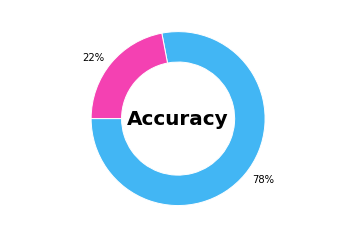

In [83]:
c1 = (66, 182, 244)
c2 = (244, 65, 178)

wright = 78
wrong = 100-wright

make_pie([wright,wrong], "Accuracy", [c1,c2], [str(wright) + '%', str(wrong) + '%'])